# Deep Cost-to-Go (DC2G)
Michael Everett, Justin Miller, Jonathan P. How, "Planning Beyond the Sensing Horizon Using a Learned Context", IROS 2019 (Best Paper on Cognitive Robotics)

Paper: https://arxiv.org/abs/1908.09171

Video: https://youtu.be/yVlnbqEFct0

**Goal:** This notebook explains how to initialize the environment and plan one episode with a chosen planner.

### Import libraries

In [16]:
import sys
sys.path.insert(0,'gym-minigrid')
from dc2g.run_episode import start_experiment, run_episode
from dc2g.planners.util import instantiate_planner
import gym, gym_minigrid
import matplotlib.pyplot as plt

### Initialize the environment

In [22]:
env = gym.make('MiniGrid-DrivewayEnv-32x32-v0')
env.seed(seed=0)
env.use_semantic_coloring = True
difficulty_level = 'test_scenario'
env.set_difficulty_level(difficulty_level)
obs = env.reset()

### See full environment map

Full environment map:


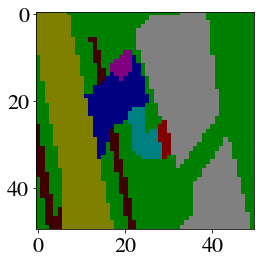

In [25]:
plt.imshow(env.world_array)
print("Full environment map:")

### Show components of initial observation

Current position: [ 6 23]
Current heading (radians): 0.0
Current heading index (discretized): 0
Current direction: 0
Current mission: get to the yellow goal square
Current semantic gridmap:


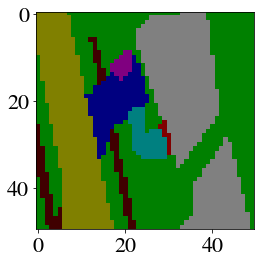

In [21]:
plt.imshow(obs['semantic_gridmap'])
print('Current position: {}'.format(obs['pos']))
print('Current heading (radians): {}'.format(obs['theta']))
print('Current heading index (discretized): {}'.format(obs['theta_ind']))
print('Current direction: {}'.format(obs['direction']))
print('Current mission: {}'.format(obs['mission']))
print('Current semantic gridmap:')

### Initialize the planner

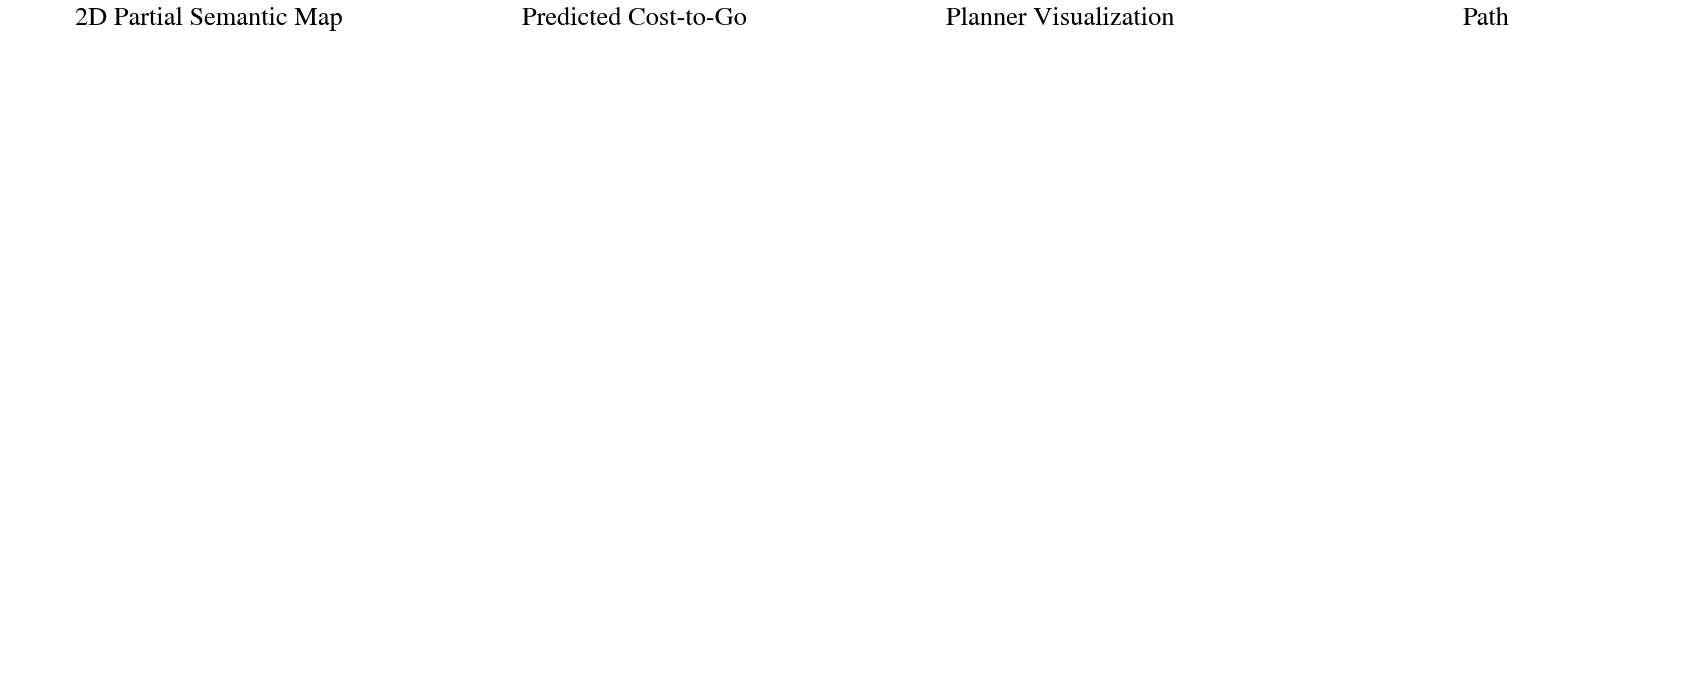

In [32]:
# Initialize the planner
planner_name = "oracle"
planner = instantiate_planner(planner_name, env, "MiniGrid")

### Run an episode

In [34]:
while env.step_count < env.max_steps:

    # Use latest observation to choose next action
    if obs['semantic_gridmap'] is None:
        action = 0
    else:
        action = planner.plan(obs)

    # Execute the action in the environment and receive new observation
    obs, reward, done, info = env.step(action)

    print(obs['pos'], obs['theta_ind'])

    # env.render('human')
    if done:
        print('Done! Took {} steps.'.format(env.step_count))
        planner.animate_episode(fig_type="observation")
        break

--- plan ---
self.actions_to_goal: [0]
action: 0
Goal reached!
[30 29] 1
Done! Took 33 steps.
